# <font color="#704214">HIGH VALUE CUSTOMER IDENTIFICATION (INSIDERS)</font>

# <font color='8a795d'>Solution Planning (IOT)</font>

### INPUT (ENTRADA)

1. **PROBLEMA DE NEGÓCIO**
    - Selecionar os clientes mais valiosos para integrar um programa de fidelidade chamado **"INSIDERS"**
    
    
2. **CONJUNTO DE DADOS**
    - Vendas de um e-commerce online, durante o período de 1 ano (Nov 2015 to Dec 2017)

### OUTPUT (SAÍDA)

1. **LISTA DE CLIENTES**
 - Uma lista com a indicação das pessoas que farão parte do programa **INSIDERS**
    
    
2. **RELATÓRIO DE RESPOSTAS**
 - Um relatório contendo as respostas para as seguintes perguntas de negócio:
    - *Quem são as pessoas elegíveis para participar do programa de Insiders ?*
    - *Quantos clientes farão parte do grupo?*
    - *Quais as principais características desses clientes ?*
    - *Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?*
    - *Qual a expectativa de faturamento desse grupo para os próximos meses ?*
    - *Quais as condições para uma pessoa ser elegível ao Insiders ?*
    - *Quais as condições para uma pessoa ser removida do Insiders ?*
    - *Qual a garantia que o programa Insiders é melhor que o restante da base ?*
    - *Quais ações o time de marketing pode realizar para aumentar o faturamento?*    

### TASKS (TAREFAS)

***1. Quem são as pessoas elegíveis para participar do programa de Insiders?***
 - O que é ser ***ELEGÍVEL***? Como a empresa define um cliente ***VALIOSO***?
 - 3 Abordagens:
     - Faturamento:
          - Alto Ticket Médio (valor médio das compras)
          - Alto LTV (Lifetime Value: o valor retornado pelo cliente ao longo do tempo)
          - Baixa Recência (tempo desde a última compra) ou Alta Frequência ( quantidade de compras )
          - Alto Basket Size ( quantidade média de produtos comprados )
          - Baixa probabilidade de Churn (encerrar relacionamento/contrato)
          - Alta Previsão de LTV
          - Alta propensão de compra

     - Custo:
          - Baixo número de devoluções

     - Experiência:  
          - Média alta de avaliações
            
            
***2. Quantos clientes farão parte do grupo?***
  - Número de clientes
  - % do grupo em relação ao total de clientes
    
    
***3. Quais as principais características desses clientes?***
  - Escrever os principais atributos dos clientes
       - Idade
       - País
       - Salário
        
  - Escrever os principais comportamentos de compra dos clientes ( métricas de negócio )
       - Atributos da clusterização (vide acima)
    
    
***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?***
  - Calcular o faturamento total da empresa durante o ano.
  - Calcular o faturamento (%) apenas do cluster Insiders.
  
    
***5. Qual a expectativa de faturamento desse grupo para os próximos meses?***
  - Cálculo do LTV do grupo Insiders
  - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
  - Análise de COHORT
    

***6. Quais as condições para uma pessoa ser elegível ao Insiders?***
  - Qual o período de avaliação (semanal, mensal)?
  - O "desempenho" do cliente está próximo da média do cluster *Insiders*. 
    
    
***7. Quais as condições para uma pessoa ser removida do Insiders?***
  - O "desempenho" do cliente não está mais próximo da média do cluster *Insiders*. 
    
    
***8. Qual a garantia que o programa Insiders é melhor que o restante da base?***
  - Teste de Hipóteses
  - Teste A/B (Bayesiano)
    
    
***9. Quais ações o time de marketing pode realizar para aumentar o faturamento?***
  - Descontos
  - Preferências de escolha
  - Produtos exclusivos

# <font color='8a795d'>0.0 Settings</font>

## <font color='8a795d'>0.1 Imports</font>

In [194]:
import numpy               as np
import pandas              as pd
import seaborn             as sns
#import umap.umap_          as umap
import pickle
from   umap                import umap_   as umap
from   IPython.display     import HTML
from   matplotlib          import pyplot  as plt
from   sklearn             import cluster as cl
from   sklearn             import metrics as m
from   yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from   plotly              import express as px

## <font color='8a795d'>0.2 Helper Functions</font>

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## <font color='8a795d'>0.3 Loading Dataset</font>

In [3]:
# load data
df_raw = pd.read_csv('../data/raw/ecommerce.csv')

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color='8a795d'>1.0 Data Description</font>

In [5]:
#security copy
df1 = df_raw.copy()

## <font color='d2b48c'>1.1 Rename Columns</font>

In [6]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 
            'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
99278,544766,20713,JUMBO BAG OWLS,3,21-Feb-17,4.13,NaN,United Kingdom


## <font color='d2b48c'>1.2 Data Dimensions</font>

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## <font color='d2b48c'>1.3 Data Types</font>

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color='d2b48c'>1.4 Check NA</font>

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color='d2b48c'>1.5 Remove NA</font>

In [10]:
# remove NA
df1 = df1.dropna( subset=['description','customer_id'] )
print('Removed data: {:.2f}%'.format( ( 1 - ( df1.shape[0] / df_raw.shape[0] ) )*100 ) )

Removed data: 24.93%


In [11]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <font color='d2b48c'>1.6 Change Dtypes</font>

In [12]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype( int )

df1.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
115156,546108,22127,PARTY CONES CARNIVAL ASSORTED,36,2017-03-07,1.25,15529,United Kingdom
419988,572866,85099B,JUMBO BAG RED RETROSPOT,3,2017-10-24,2.08,15005,United Kingdom
358661,568158,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2017-09-23,1.25,16133,United Kingdom
498451,578520,23491,VINTAGE JINGLE BELLS HEART,1,2017-11-22,8.25,14591,United Kingdom
26267,538508,22489,PACK OF 12 TRADITIONAL CRAYONS,4,2016-12-10,0.42,15998,United Kingdom


In [13]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## <font color='d2b48c'>1.7 Descriptive Statistics</font>

In [14]:
df1.describe()

,quantity,unit_price,customer_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# <font color='8a795d'>2.0 Feature Engineering</font>

In [15]:
#security copy
df2 = df1.copy()

## <font color='d2b48c'>2.1 Feature Creation</font>

In [16]:
# data reference
df_ref = df2.drop( ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 
                    'unit_price', 'country'], axis=1 ).drop_duplicates().reset_index( drop=True )

In [17]:
# Gross Revenue (Faturamento) = quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

# Recency (last day purchase)
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_frequency = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'invoice_freq'})
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left')

# Average Ticket
df_avg_ticket = df2[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(
columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

In [18]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# <font color='8a795d'>3.0 Variable Filtering</font>

In [19]:
#security copy
df3 = df_ref.copy()

# <font color='8a795d'>4.0 EDA (Exploratory Data Analysis)</font>

In [20]:
#security copy
df4 = df3.copy()

# <font color='8a795d'>5.0 Data Preparation</font>

In [21]:
#security copy
df5 = df4.copy()

# <font color='8a795d'>6.0 Feature Selection</font>

In [22]:
#security copy
df6 = df5.copy()

# <font color='8a795d'>7.0 Hyperparameter Fine_Tunning</font>

In [23]:
#security copy
X = df6.drop( columns=['customer_id'])

In [24]:
clusters = [2,3,4,5,6,7,8,9]

***Compactness(Cohesion)***
 - O grau de separação entre os clusters dado pela maior distância possível entre os centróides de cada cluster
 
***Separation***
 - O grau de compactação do cluster dado pela menor distância possível entre o centróide e os demais elementos do cluster

***Métricas***
 - WSS (Within-Cluster Sum of Square): Compactness
 - SS (Silhouette Score): Compactness and Separation

## <font color='d2b48c'>7.0.1 Within-Cluster Sum of Square (WSS)</font>

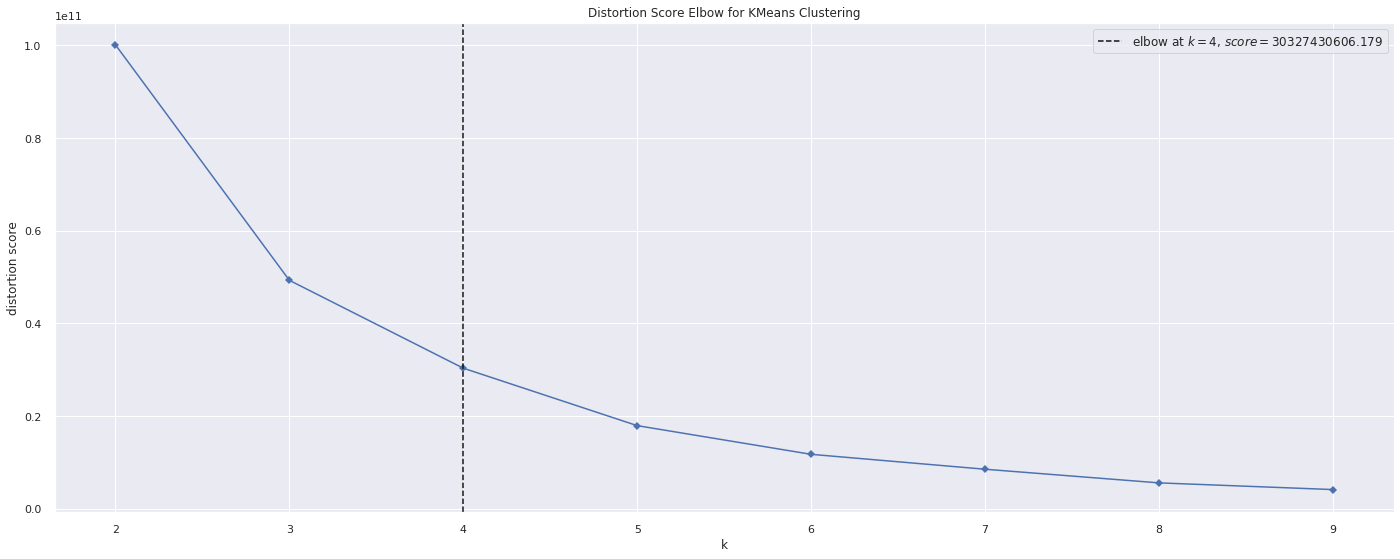

In [25]:
kmeans = KElbowVisualizer( cl.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## <font color='d2b48c'>7.0.2 Silhouette Score (SS)</font>

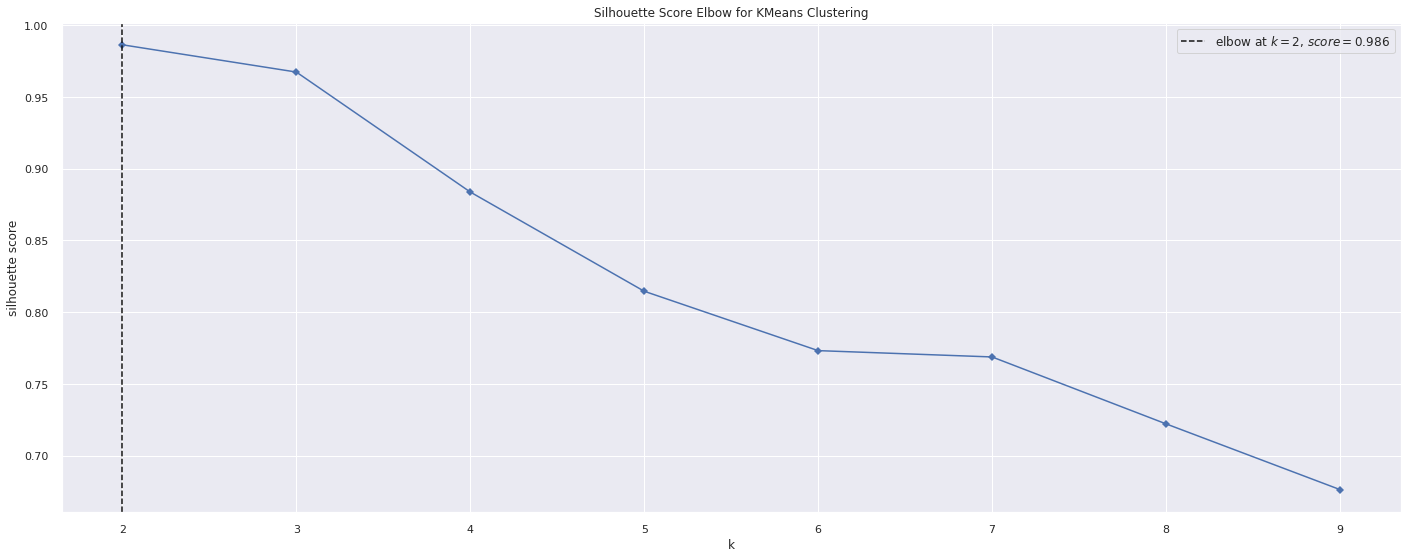

In [26]:
# Ai: distância média do ponto i a todos os demais elementos do próprio cluster
# Bi: distância média do ponto i a todos os elementos do cluster mais próximo
# Si: silhouette de cada ponto i do dataset, dada pelo quociente da diferença entre Bi e Ai e o maior deles
# SS: média das silhouettes de cada ponto do dataset. Quanto mais próximo de 1, melhor o k (nº de clusters)
# essa métrica considera tanto as distâncias intracluster quanto as distâncias entre clusters.
kmeans = KElbowVisualizer( cl.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

## <font color='d2b48c'>7.1 Silhouette Analysis</font>

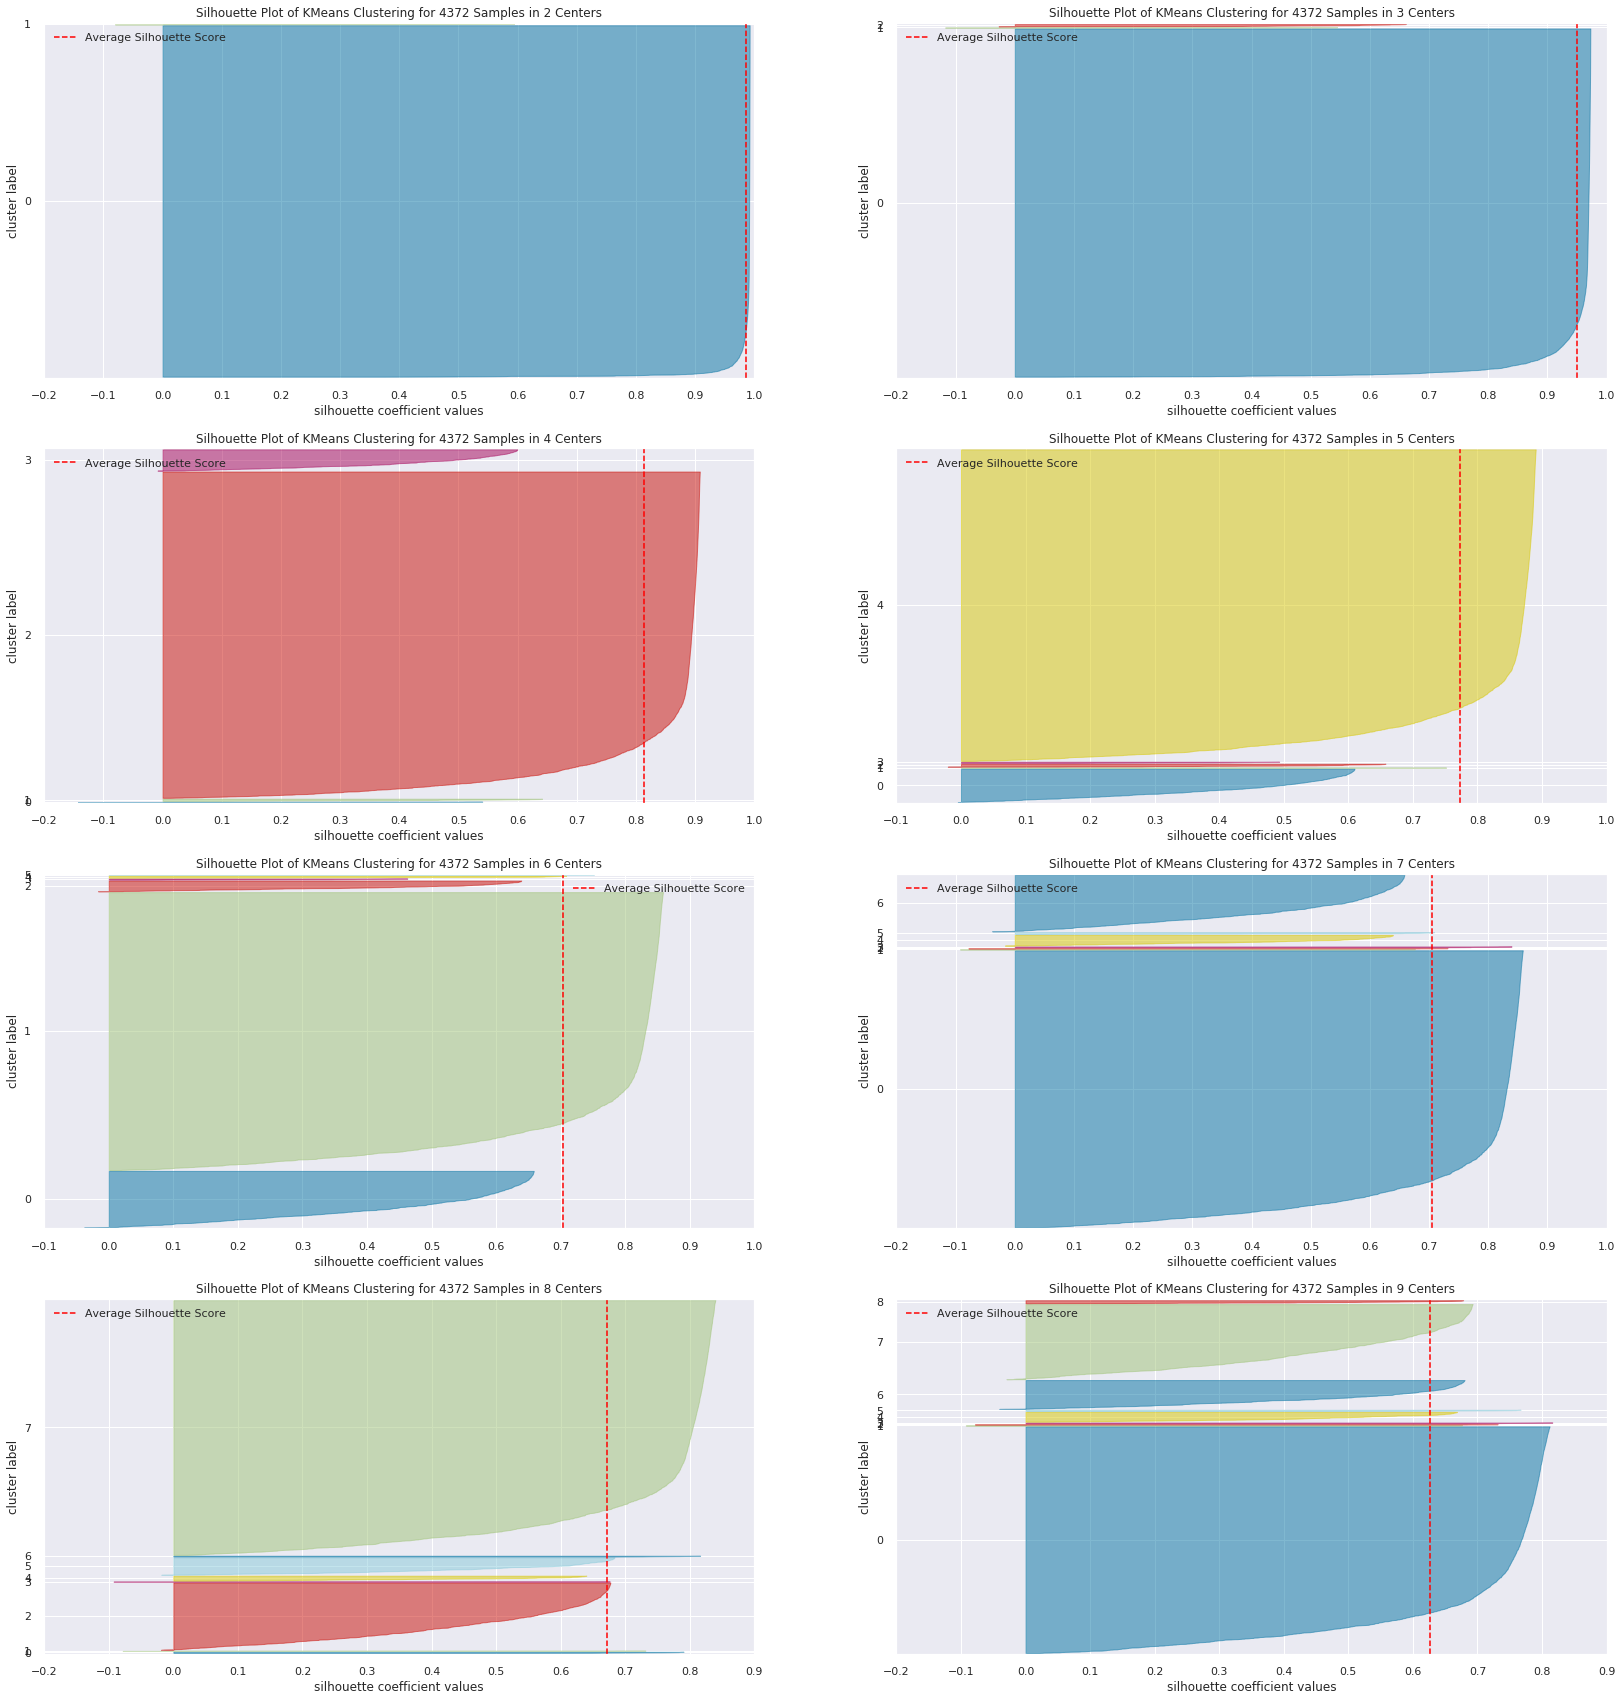

In [26]:
fig, ax = plt.subplots( 4, 2, figsize=(28,30) )

for k in clusters:
    km = cl.KMeans( n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42 )
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit(X)
    visualizer.finalize()

# <font color='8a795d'>8.0 Model Training</font>

## <font color='d2b48c'>8.1 K-Means</font>

In [25]:
# model definition
k = 4
kmeans = cl.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color='d2b48c'>8.2 Cluster Validation</font>

In [26]:
# Within-Cluster Sum of Square (WSS)
print("WSS value: {}".format(kmeans.inertia_))

# Silhouette Score (SS)
print("SS value: {}".format(m.silhouette_score( X, labels, metric='euclidean')))

WSS value: 40056254626.3
SS value: 0.8139972028952444


# <font color='8a795d'>9.0 Cluster Analysis</font>

In [161]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,2
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,2
4,15100,635.10,330,6,105.850000,2


## <font color='d2b48c'>9.1 Visual Inspection</font>

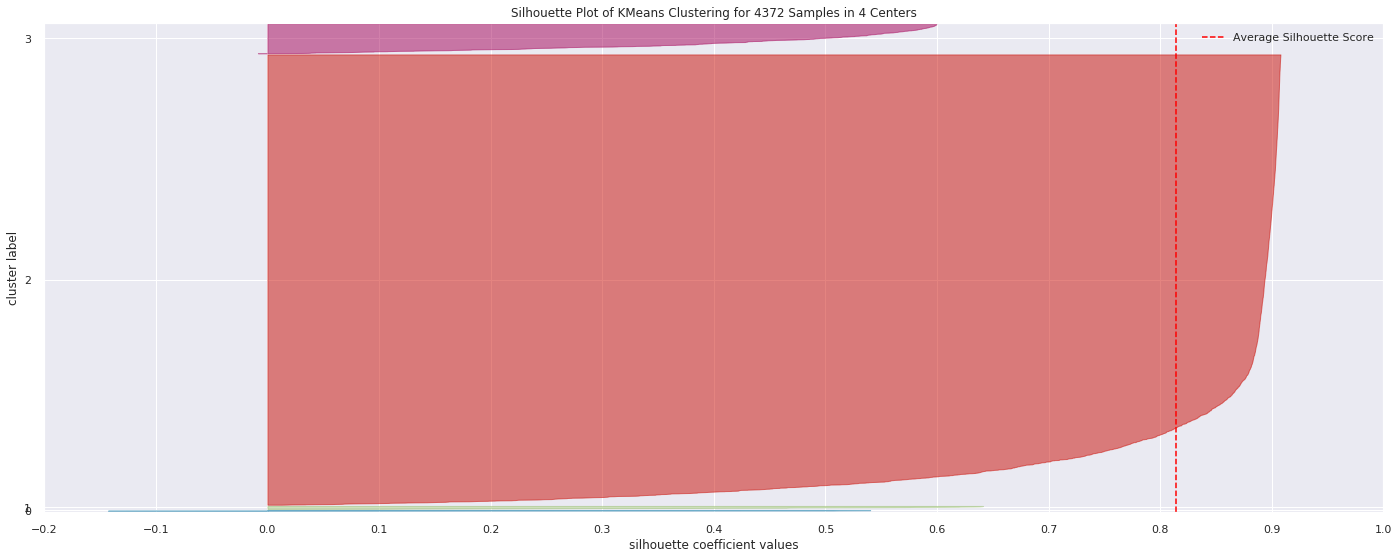

In [28]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## <font color='d2b48c'>9.2 2D Plot</font>

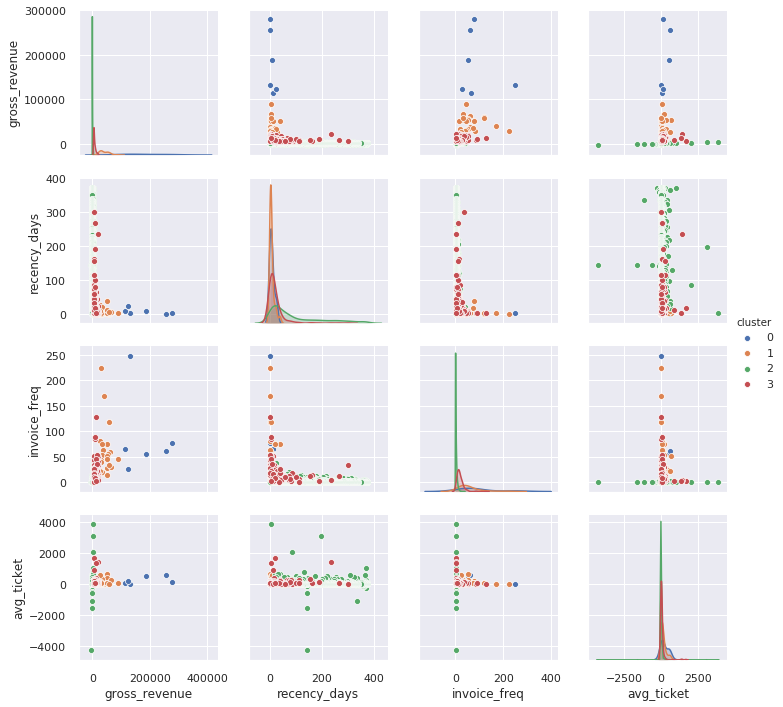

In [29]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster', vars=df_viz.columns[:-1] );

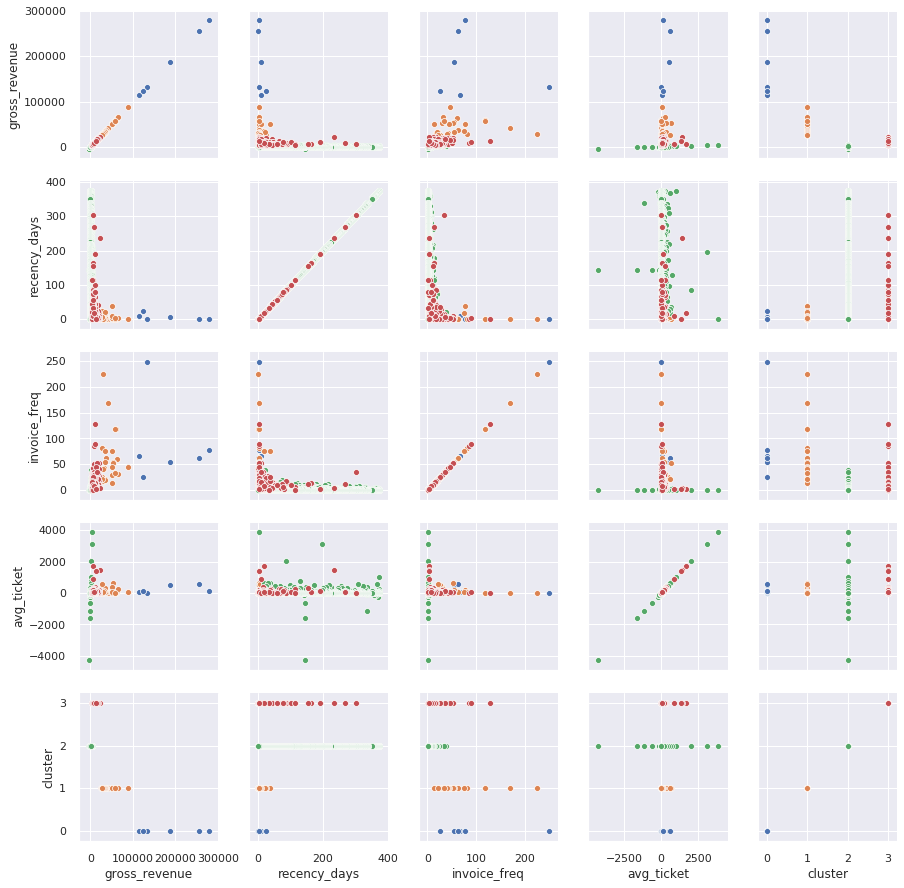

In [34]:
df_viz = df9.drop( columns='customer_id', axis=1 )
g = sns.PairGrid(df_viz, hue ='cluster')
g = g.map(sns.scatterplot)

## <font color='d2b48c'>9.3 UMAP</font>

In [89]:
reducer = umap.UMAP( n_neighbors=30, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot
sns.scatterplot( x='embedding_x', 
                y='embedding_y', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len( df_viz['cluster'].unique() ) ),
                data=df_viz )

PicklingError: ("Can't pickle <class 'numpy.dtype[float32]'>: it's not found as numpy.dtype[float32]", 'PicklingError while hashing array([[5.2886299e+03, 3.0200000e+02, 3.5000000e+01, 1.6950737e+01],\n       [3.0791001e+03, 3.1000000e+01, 1.8000000e+01, 1.5709694e+01],\n       [7.1873398e+03, 2.0000000e+00, 1.8000000e+01, 2.8634821e+01],\n       ...,\n       [3.6000000e+02, 1.0000000e+00, 1.0000000e+00, 1.8000000e+02],\n       [2.2739000e+02, 1.0000000e+00, 1.0000000e+00, 1.8949167e+01],\n       [8.4854999e+02, 0.0000000e+00, 1.0000000e+00, 2.2330263e+01]],\n      dtype=float32): PicklingError("Can\'t pickle <class \'numpy.dtype[float32]\'>: it\'s not found as numpy.dtype[float32]")')

## <font color='d2b48c'>9.4 t-SNE</font>

## <font color='d2b48c'>9.5 Cluster Profile</font>

In [174]:
# Number of customers
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customers'] = 100*( df_cluster['customer_id']/df_cluster['customer_id'].sum() )
df_cluster = df_cluster.rename(columns={'customer_id':'customers'})

# Average Gross Revenue
df_avg_gross_rev = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_avg_gross_rev['perc_revenue'] = 100*( df_avg_gross_rev['gross_revenue']/df_avg_gross_rev['gross_revenue'].sum() )
df_cluster = pd.merge( df_cluster, df_avg_gross_rev, on='cluster', how='inner' )

# Average Recency Days
df_avg_rec_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_rec_days, on='cluster', how='inner' )

# Average Invoice Frequency
df_avg_inv_freq = df9[['invoice_freq','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_inv_freq, on='cluster', how='inner' )

# AVerage Ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_ticket, on='cluster', how='inner' )

In [184]:
# Strength: candidate to Insiders
df_cluster['strength'] = (np.log(df_cluster['gross_revenue'])+df_cluster['invoice_freq']+df_cluster['avg_ticket'])/df_cluster['recency_days']
insiders_cluster = df_cluster.loc[df_cluster['strength']>=df_cluster['strength'].max()]['cluster'][0]
df_cluster

,cluster,customers,perc_customers,gross_revenue,perc_revenue,recency_days,invoice_freq,avg_ticket,strength
0,0,6,0.137237,182181.981667,77.911453,7.166667,89.000000,253.626345,49.498480
1,1,28,0.640439,42614.387143,18.224353,6.178571,57.821429,162.862605,37.442956
2,2,4071,93.115279,946.696250,0.404862,96.969295,3.641120,25.359654,0.369743
3,3,267,6.107045,8089.028652,3.459332,20.280899,19.528090,62.783157,4.502242


In [185]:
# Show Cluster Profiles
for k in range(len(df_cluster)):
    if k == insiders_cluster:
        print('\033[1m\033[4m\033[91m'+'Cluster {}'.format(df_cluster['cluster'][k])+' (Insiders)'+'\033[0m')
    else:
        print('\033[1m'+'\033[4m'+'Cluster {}'.format(df_cluster['cluster'][k])+'\033[0m')    
    print('N° de Customers: {}'.format(df_cluster['customers'][k])+
            ' ({:.2f}'.format(df_cluster['perc_customers'][k])+'% dos Customers)')
    print('Receita media: ${:.2f}'.format(df_cluster['gross_revenue'][k])+
            ' ({:.1f}'.format(df_cluster['perc_revenue'][k])+'% da Receita)')
    print('Recencia media: {:.0f}'.format(df_cluster['recency_days'][k])+' dias')
    print('Frequencia media: {:.0f}'.format(df_cluster['invoice_freq'][k])+' compras')
    print('Ticket Medio: ${:.2f}'.format(df_cluster['avg_ticket'][k])+'\n')

Cluster 0 (Insiders)
N° de Customers: 6 (0.14% dos Customers)
Receita media: $182181.98 (77.9% da Receita)
Recencia media: 7 dias
Frequencia media: 89 compras
Ticket Medio: $253.63

Cluster 1
N° de Customers: 28 (0.64% dos Customers)
Receita media: $42614.39 (18.2% da Receita)
Recencia media: 6 dias
Frequencia media: 58 compras
Ticket Medio: $162.86

Cluster 2
N° de Customers: 4071 (93.12% dos Customers)
Receita media: $946.70 (0.4% da Receita)
Recencia media: 97 dias
Frequencia media: 4 compras
Ticket Medio: $25.36

Cluster 3
N° de Customers: 267 (6.11% dos Customers)
Receita media: $8089.03 (3.5% da Receita)
Recencia media: 20 dias
Frequencia media: 20 compras
Ticket Medio: $62.78



# <font color='8a795d'>10.0 Deploy To Production</font>